In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
  

In [11]:
feature_file = sys.path[1]+'\\Data\\EPL_Set.csv'
# The direct link to the Kaggle data set
scores = pd.read_csv(feature_file,delimiter=',')
scores['FGD'] = scores['FTHG'] - scores['FTAG']
scores['Season'] = scores['Season'].apply(lambda x: int(x[:4]))


In [3]:
def league_table(season,blank=False):
  
  season_data = scores[scores['Season'] == season]
  teams = pd.DataFrame(season_data['HomeTeam'].unique(),columns=['Team'])
  teams.set_index('Team', drop=True, inplace=True)
  teams['Points'] = 0
  if blank==False:
    
    for index, game in season_data.iterrows():
      if game['FTHG'] > game['FTAG']:
        teams.loc[game['HomeTeam']]['Points'] +=3
        
      elif game['FTHG'] == game['FTAG']:
        teams.loc[game['HomeTeam']]['Points'] +=1
        teams.loc[game['AwayTeam']]['Points'] +=1
      
      else:
        teams.loc[game['AwayTeam']]['Points'] +=3
       
      teams.sort_values(by='Points', ascending=False,inplace=True)
      
  return teams

In [4]:
def sim_game(home,away,season):
  past = scores[scores['Season']<season]
  past =  past[past['Season']>=(season-5)]
  
  x = np.random.poisson(past[(past['HomeTeam'] == home) & \
                           (past['AwayTeam'] == away)]['FTHG'].mean(),1000).mean()
  
  y = np.random.poisson(past[(past['HomeTeam'] == home) & \
                           (past['AwayTeam'] == away)]['FTAG'].mean(),1000).mean()

  
  if x>y:
    return [home + " beats " + away,home,3,away,0] 
  elif x==y:
    return [away + " draw " + home,home,1,away,1]
  else:
    return [away + " beats " + home,home,0,away,3]

In [5]:
def plot_score_dist(home, away, season,plot_for="Home",trials=1000):
  past = scores[scores['Season']<season]
  past =  past[past['Season']>=(season-5)]
  

  home_results = []
  away_results = []
  
  
  x = np.random.poisson(past[(past['HomeTeam'] == home) & \
                           (past['AwayTeam'] == away)]['FTHG'].mean(),trials)
  home_results.append(x)
  
  y = np.random.poisson(past[(past['HomeTeam'] == home) & \
                           (past['AwayTeam'] == away)]['FTAG'].mean(),trials)
  away_results.append(y)

  
  
  if plot_for == "Home": plt.hist(home_results); plt.show()
  
  elif plot_for == "Away": plt.hist(away_results); plt.show()
  
  

In [6]:
teams = list(set(scores['HomeTeam'].values.tolist()))
s = 2017
league = league_table(s,blank=True)

for index,match in scores[scores['Season'] == s].iterrows():
  result = sim_game(match['HomeTeam'],match['AwayTeam'],s)
  print(result[0])
  league.loc[match['HomeTeam']]['Points'] += result[2]
  league.loc[match['AwayTeam']]['Points'] += result[4]
  
league.sort_values('Points',ascending=False)

top=[]
bottom=[]
for i in range(2008,2018):
  bottom.append(sum(league_table(i)[-10:].values)[0])
  top.append(sum(league_table(i)[:10].values)[0])

Arsenal beats Leicester
Man City draw Brighton
Chelsea beats Burnley
Huddersfield draw Crystal Palace
Everton beats Stoke
Southampton beats Swansea
Watford beats Liverpool
West Brom beats Bournemouth
Man United beats West Ham
Tottenham beats Newcastle
Watford beats Bournemouth
West Brom beats Burnley
Brighton draw Leicester
Crystal Palace beats Liverpool
West Ham beats Southampton
Arsenal beats Stoke
Man United beats Swansea
Newcastle draw Huddersfield
Tottenham beats Chelsea
Man City beats Everton
Man City beats Bournemouth
Swansea beats Crystal Palace
Southampton draw Huddersfield
Man United beats Leicester
Newcastle beats West Ham
Brighton draw Watford
Chelsea beats Everton
Liverpool beats Arsenal
Tottenham beats Burnley
West Brom beats Stoke
Arsenal beats Bournemouth
West Brom draw Brighton
Tottenham beats Everton
Chelsea beats Leicester
Liverpool beats Man City
Southampton beats Watford
Stoke beats Man United
Crystal Palace beats Burnley
Swansea beats Newcastle
Huddersfield draw W

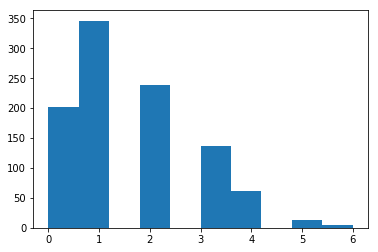

In [8]:
plot_score_dist('Arsenal','Everton',season=s)

In [ ]:
plot_score_dist('Arsenal','Everton',season=s)